# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

#### Importar a Base de dados

In [4]:
import pandas as pd

tabela = pd.read_csv("advertising.csv")
display(tabela)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

In [5]:
display(tabela.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


None

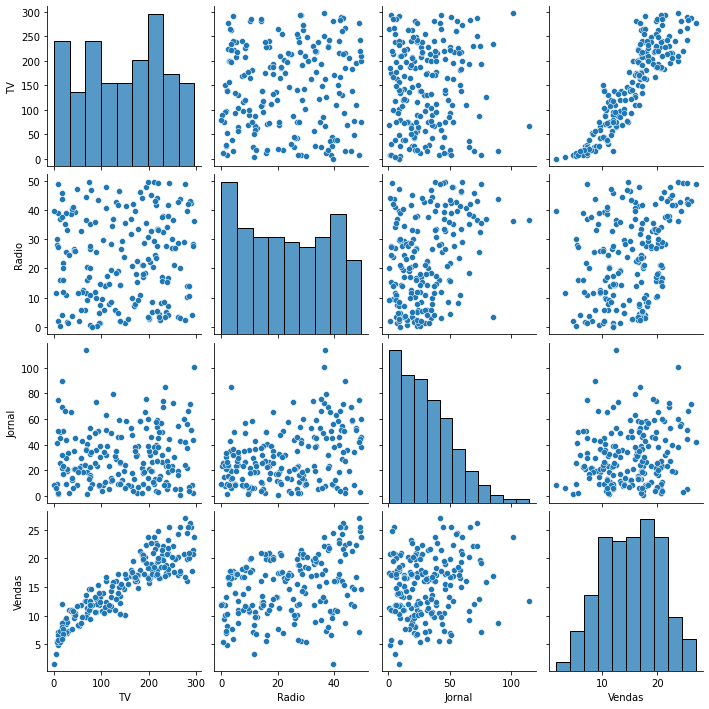

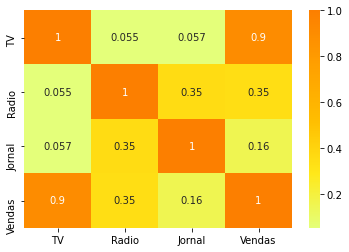

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(tabela)
plt.show()

sns.heatmap(tabela.corr(), cmap="Wistia", annot=True) # mostrando a correlação/comparação dessa tabela com a cor Wistia e com os números também
plt.show()

#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [27]:
from sklearn.model_selection import train_test_split # da biblioteca skleanr.model_selection vai importar o train_test_split que vai separar as informações

x = tabela.drop("Vendas", axis=1) # excluindo a coluna de vendas
y = tabela["Vendas"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) # ou seja, quero separar 30% pra testar, e os outros 70% para treinar

#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [32]:
# como o objetivo é descobrir qual o valor de vendas, então por isso temos que usar o de regressão
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import numpy as np

# criando inteligência artificial
linear = LinearRegression()
random = RandomForestRegressor()

# treinando inteligência artificial
linear.fit(x_train, y_train)
random.fit(x_train, y_train)

RandomForestRegressor()

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece
- Também vamos olhar o MSE (Erro Quadrático Médio) -> diz o quanto o nosso modelo "erra" quando tenta fazer uma previsão

In [35]:
# aqui a gente descobre qual desses modelos é o melhor modelo

from sklearn import metrics

# previsão de teste
test_linear = linear.predict(x_test)
test_random = random.predict(x_test)

# r2
r2_linear = metrics.r2_score(y_test, test_linear) # vai comparar quais foram os valores que ele fez da previsão e quais são os valores corretos
r2_random = metrics.r2_score(y_test, test_random)
print(r2_linear, r2_random)

# erro
erro_linear = metrics.mean_squared_error(y_test, test_linear)
erro_random = metrics.mean_squared_error(y_test, test_random)
print(erro_linear, erro_random)

# o melhor modelo nesse caso é o random

0.9071151423684273 0.9628639400164821
2.370659971225657 0.9478075666666679


#### Visualização Gráfica das Previsões

,Vendas Reais,Previsao Random
0,23.8,23.512
1,16.6,17.852
2,11.9,12.505
3,19.8,17.818
4,17.6,20.197
5,25.5,24.933
6,16.9,16.908
7,17.9,16.740
8,10.5,11.036
9,17.1,18.228


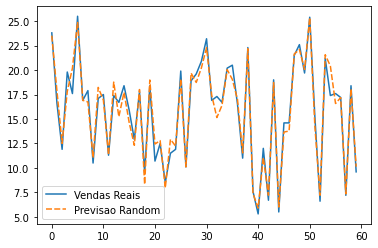

In [40]:
tabela_comparacao = pd.DataFrame()
tabela_comparacao["Vendas Reais"] = y_test
tabela_comparacao["Previsao Random"] = test_random
tabela_comparacao = tabela_comparacao.reset_index(drop=True) # vai dar um reset no index e jogar o antigo fora

display(tabela_comparacao)
# vendo no formato de gráfico
sns.lineplot(data=tabela_comparacao)
plt.show()

#### Qual a importância de cada variável para as vendas?

[0.85617224 0.12645971 0.01736804]
TV Radio Jornal


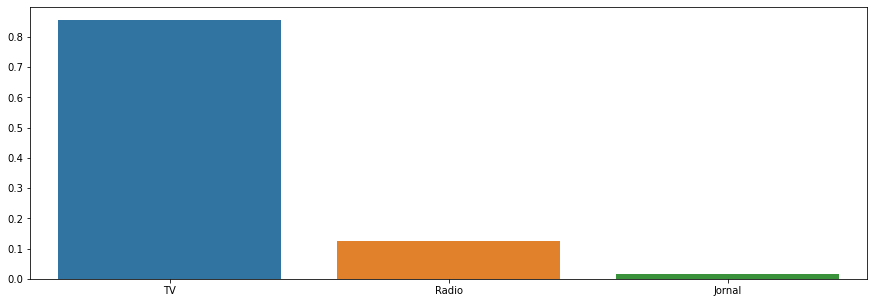

In [49]:
print(random.feature_importances_)
print("TV", "Radio","Jornal")

plt.figure(figsize=(15, 5))
sns.barplot(x=x_train.columns, y=random.feature_importances_)
plt.show()

#### Será que estamos investindo certo?

In [43]:
print(tabela[["Radio", "Jornal"]].sum())

Radio     4652.8
Jornal    6110.8
dtype: float64
